# Tugas 3 - Decision Tree with Iris Dataset

Nama : Muhammad Muqtafin Nuha <br>
NIM  : 210411100218

## Sumber
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://towardsdatascience.com/heart-disease-prediction-73468d630cfc"><img src="https://miro.medium.com/v2/resize:fill:30:30/1*sHhtYhaCe2Uc3IU0IgKwIQ.png" /> Heart Disease Prediction</a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/code/ismailsefa/heart-disease-predic-machine-learning-naive-bayes/notebook"><img src="https://www.kaggle.com/static/images/site-logo.svg" height='28px' /> Heart Disease Predic Machine Learning Naive Bayes</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/iamwilldev/Kumpulan-Dataset/blob/master/Iris.csv"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> Liat Dataset di GitHub</a>
  </td>
</table>

1. Bentuk pohon keputusan dari data <a target="_blank" href="https://github.com/iamwilldev/Kumpulan-Dataset/blob/master/Iris.csv">Iris</a> dengan split dataset training dan testing 0.8/0.2 
2. Berikan penjelasan proses secara detail
3. Bandingkan hasilnya dengan k-nn dan naive bayes
4. hasilnya di upload di repository masig masing

## 1. Analisa data

### Install Library & Module

In [1]:
%%capture
!pip install pandas-profiling

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn import tree

%matplotlib inline

<ipython-input-2-701aaa84f12e>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


### Ambil Dataset

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/iamwilldev/Kumpulan-Dataset/master/Iris.csv")
print("Banyak baris/objek data", data.shape[0])
print("Banyak kolom/atribut data", data.shape[1])
print("Tampilan 5 data teratas :")
data.head()

Banyak baris/objek data 150
Banyak kolom/atribut data 6
Tampilan 5 data teratas :


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Penjelasan Data

#### Tentang Dataset

Dataset Iris digunakan di R.A. Fisher's classic tahun 1936, The Use of Multiple Measurements in Taxonomic Problems, dan juga dapat ditemukan di UCI Machine Learning Repository.

Ini mencakup tiga spesies iris dengan masing-masing 50 sampel serta beberapa sifat tentang setiap bunga. Satu spesies bunga dapat dipisahkan secara linear dari dua lainnya, tetapi dua lainnya tidak dapat dipisahkan secara linear satu sama lain.

Sumber :   <a target="_blank" href="https://www.kaggle.com/datasets/uciml/iris"><img src="https://www.kaggle.com/static/images/site-logo.svg" height='28px'  /> Iris Species</a>

#### Penjelasan Kolom

<table class="tfo-notebook-buttons" align="left">
  <tr>
    <td>
      No
    </td>
    <td>
      Nama Kolom
    </td>
  </tr>
  <tr>
    <td>
      1.
    </td>
    <td>
      Id
    </td>
  </tr>
  <tr>
    <td>
      2.
    </td>
    <td>
      SepalLengthCm
    </td>
  </tr>
  <tr>
    <td>
      3.
    </td>
    <td>
      SepalWidthCm
    </td>
  </tr>
  <tr>
    <td>
      4.
    </td>
    <td>
      PetalLengthCm
    </td>
  </tr>
  <tr>
    <td>
      5.
    </td>
    <td>
      PetalWidthCm
    </td>
  </tr>
  <tr>
    <td>
      6.
    </td>
    <td>
      Species
    </td>
  </tr>
</table>

#### Drop Id Column

In [4]:
data = data.drop(['Id'], axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking the target categorical counts

In [5]:
data['Species'].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Check missing values in variables

In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Separating Features and Labels

In [7]:
X = data.iloc[:, 0:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = data.iloc[:, -1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### Splitting Dataset into Training Set and Testing Set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Standardisation

In [10]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit(X_train)
# X_test = scaler.transform(X_test)

#### Build Decision Tree Classification based on Gini index criterion

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

#Check for overfitting and underfitting
print('Accuracy (Training Set): ', clf_gini.score(X_train, y_train))
print('Accuracy (Test Set): ', clf_gini.score(X_test, y_test))

Accuracy (Training Set):  0.9583333333333334
Accuracy (Test Set):  1.0


##### Pictorial representation of Decision Tree

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

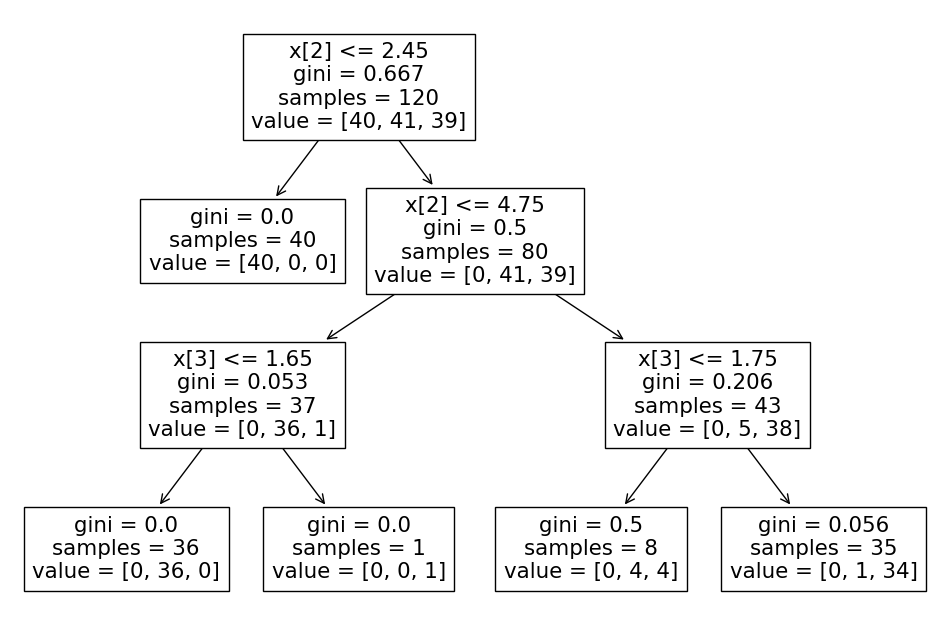

In [12]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
import graphviz

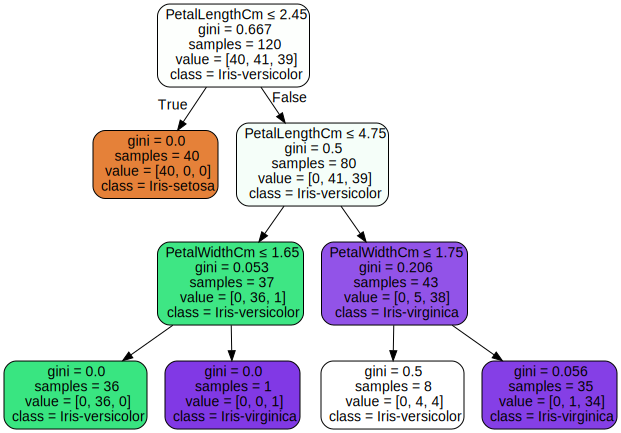

In [14]:
# Export the decision tree as DOT data
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                               feature_names=X_train.columns,  
                              class_names=y_train.unique(),  
                              filled=True, rounded=True,  
                              special_characters=True)


# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Save the graph as a PDF file
graph.render("decision_tree_graph")

graph

#### Build Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Creating a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Training the classifier
classifier.fit(X_train, y_train)

# Predicting the training set results
y_train_pred = classifier.predict(X_train)

# Calculating and printing the accuracy for the training set
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy (Training Set):", accuracy_train)

# Predicting the test set results
y_test_pred = classifier.predict(X_test)

# Calculating and printing the accuracy for the test set
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy (Test Set):", accuracy_test)


Accuracy (Training Set): 0.95
Accuracy (Test Set): 1.0


#### Build KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Creating a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier
knn.fit(X_train, y_train)

# Predicting the training set results
y_train_pred = knn.predict(X_train)

# Calculating and printing the accuracy for the training set
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy (Training Set):", accuracy_train)

# Predicting the test set results
y_test_pred = knn.predict(X_test)

# Calculating and printing the accuracy for the test set
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy (Test Set):", accuracy_test)

Accuracy (Training Set): 0.9666666666666667
Accuracy (Test Set): 1.0


### Perbandingan Metode Decision Tree, Naive Bayes dan KNN pada data Iris

In [17]:
print('Metode Decision Tree')
print('Accuracy (Training Set): ', clf_gini.score(X_train, y_train))
print('Accuracy (Test Set): ', clf_gini.score(X_test, y_test))
print()

print('Metode Naive Bayes')
print("Accuracy (Training Set):", accuracy_train)
print("Accuracy (Test Set):", accuracy_test)
print()

print('Metode KNN')
print("Accuracy (Training Set):", accuracy_train)
print("Accuracy (Test Set):", accuracy_test)

Metode Decision Tree
Accuracy (Training Set):  0.9583333333333334
Accuracy (Test Set):  1.0

Metode Naive Bayes
Accuracy (Training Set): 0.9666666666666667
Accuracy (Test Set): 1.0

Metode KNN
Accuracy (Training Set): 0.9666666666666667
Accuracy (Test Set): 1.0


Dari Akurasi Diatas didapatkan hasil terbaik untuk data Training terdapat pada Metode Naive Bayes dan KNN dengan Akurasi 96%. dan untuk data Test terdapat pada ketiga metode dengan Akurasi 100%